# Problem Statement
Management of hyperglycemia in hospitalized patients has a significant bearing on outcome, in terms of both morbidity and mortality. However, there are few national assessments of diabetes care during hospitalization which could serve as a baseline for change. This analysis of a large clinical database was undertaken to provide such an assessment and to find future directions which might lead to improvements in patient safety.  
  
Based on the given data, build a model to predict whether the patient is suffering from Diabetes or not? 


## Importing all required Libraries

In [1]:
import numpy as np #np is used for numerical operation
import pandas as pd  #pandas is used for data manipulation
import matplotlib.pyplot as plt #is used for data visualization.
import seaborn as sns ##is used for data visualization
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



# loading the data

In [2]:
##For   .xisx we use read_excel
## comma seprate value is csv

In [3]:
df = pd.read_csv("dataset_diabetes_diabetic_data.csv") #reading the csv file into pandas dataframe


In [4]:
df #CHECKING THE DATA

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70175,100677726,AfricanAmerican,Female,[80-90),1,3,7,7,60,0,17,0,1,1,491,707,250,9,No,No
70176,38726739,AfricanAmerican,Female,[70-80),1,1,7,3,57,4,11,0,0,1,786,414,424,9,No,No
70177,58160520,AfricanAmerican,Male,[90-100),1,3,7,4,21,1,8,0,0,1,820,427,276,9,No,No
70178,43686936,Caucasian,Female,[80-90),1,1,7,1,49,0,12,0,0,0,427,428,428,9,No,No


## Dropping unwanted variables

In [5]:
df.duplicated().sum() #CHECK THE DUPLICATED 

0

In [6]:
df.shape[0] #CHECK THE SHAPE

70180

In [7]:
df['patient_nbr'].nunique() ## Number of unique entries.

52500

In [8]:
df.shape[0] - df['patient_nbr'].nunique()

17680

In [9]:
df.duplicated(subset = ['patient_nbr']).sum()

17680

In [10]:
df['patient_nbr'].value_counts()

1660293      23
23199021     23
23643405     22
84428613     22
89472402     20
             ..
21355677      1
96588117      1
61555455      1
9540666       1
175429310     1
Name: patient_nbr, Length: 52500, dtype: int64

In [11]:
df['patient_nbr'].value_counts()[df['patient_nbr'].value_counts() == 1].shape[0]
##df['patient_nbr'].value_counts() == 1 this is called masking.

41923

In [12]:
df['patient_nbr'].value_counts()[df['patient_nbr'].value_counts() != 1].shape[0]

10577

In [13]:
df.drop_duplicates(subset = ['patient_nbr'], keep = 'last', inplace = True)

In [14]:
df.shape[0]

52500

In [15]:
df=df.drop(["patient_nbr"],axis=1) 

### Checking the information of the dataset.

In [16]:
df.info() # GIVE INFORMATION OF DATASET

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52500 entries, 0 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      52500 non-null  object
 1   gender                    52500 non-null  object
 2   age                       52500 non-null  object
 3   admission_type_id         52500 non-null  int64 
 4   discharge_disposition_id  52500 non-null  int64 
 5   admission_source_id       52500 non-null  int64 
 6   time_in_hospital          52500 non-null  int64 
 7   num_lab_procedures        52500 non-null  int64 
 8   num_procedures            52500 non-null  int64 
 9   num_medications           52500 non-null  int64 
 10  number_outpatient         52500 non-null  int64 
 11  number_emergency          52500 non-null  int64 
 12  number_inpatient          52500 non-null  int64 
 13  diag_1                    52500 non-null  object
 14  diag_2                


  
Out of the 19 columns, 8 are object type, while remaining 11 are int.  
Object - race, gender, age, diag_1, diag_2, diag_3, change, diabatic  
Int -admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, number_diagnoses
  

In [17]:
df['gender'].value_counts(normalize=True)*100

Female             53.666667
Male               46.329524
Unknown/Invalid     0.003810
Name: gender, dtype: float64

## Check for missing value in any column

In [18]:
# Are there any missing values ?
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [19]:
df['admission_type_id'].value_counts() ##VALUE_COUNT(),APPLIESS ON PANDAS SERIES, SO USE SINGLE BRACKE

1    26083
2    10221
3     9537
6     3716
5     2737
8      192
4        7
7        7
Name: admission_type_id, dtype: int64

In [20]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

## Summary of the data

In [21]:
df.describe(include="all").T  ##DESCRIBE ALL DATA

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,52500,6,Caucasian,38822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,52500,3,Female,28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,52500,10,[70-80),13509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,52500.0,NaN,NaN,NaN,2.147238,1.547276,1.0,1.0,2.0,3.0,8.0
discharge_disposition_id,52500.0,NaN,NaN,NaN,3.799257,5.41455,1.0,1.0,1.0,4.0,28.0
admission_source_id,52500.0,NaN,NaN,NaN,5.813924,4.400001,1.0,1.0,7.0,7.0,20.0
time_in_hospital,52500.0,NaN,NaN,NaN,4.341752,3.015526,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,52500.0,NaN,NaN,NaN,42.996171,19.347772,1.0,31.0,44.0,56.0,129.0
num_procedures,52500.0,NaN,NaN,NaN,1.398152,1.713572,0.0,0.0,1.0,2.0,6.0
num_medications,52500.0,NaN,NaN,NaN,15.192629,8.201336,1.0,10.0,14.0,19.0,81.0


# mean value

race: mean value is nan,std value is also nan and min value is also nan

gender:mean value is nan,std value is also nan and min value is also nan

age:mean value is nan,std value is also nan and min value is also nan

admission_type_id:mean value is2.147238,std value is 1.547276,min value is1.0

discharge_disposition_id:mean value is 3.799257  , std value is 5.41455   , min value is 1.0

admission_source_id:mean value is 5.813924	,  std value 4.400001,  min value1.0

time_in_hospital: mean value is 4.341752, std value is	3.015526, min value is	1.0

num_lab_procedures : mean value is 42.99617, std value is 19.347772 ,min value is 1.0

num_medications: mean value is 15.192629, std value 	8.201336, min value is	1.0	

number_outpatient: mean value is 0.28001 std value 1.034855 min value 0.0	

 number_emergency mean value is 0.12481 std value 0.66093 min value 0.0	

 number_inpatient : mean value is 0.47661	std value 1.020395	min value 0.0

diag_1: mean value,std , min value is nan

diag_2:mean value,std , min value is nan

diag_3mean value,std , min value is nan

number_diagnoses : mean value is 7.089352 std value 	2.018542	min value 1.0

change	:  mean value,std , min value is nan

diabatic:  mean value,std , min value is nan

In [22]:
df['gender'].value_counts(normalize=True)*100

Female             53.666667
Male               46.329524
Unknown/Invalid     0.003810
Name: gender, dtype: float64

In [23]:
df['diabatic'].value_counts(normalize=True)*100

Yes    65.129524
No     34.870476
Name: diabatic, dtype: float64

### class is balanced


In [24]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,Yes
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,Ch,Yes
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,No,Yes
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,Ch,Yes
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,Ch,Yes


Some variables has invalid character "?"

## Geting unique counts of all Nominal Variables

In [25]:
for column in df[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                   'diag_1', 'diag_2', 'diag_3', 'change', 'diabatic']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values(ascending=False))
    print('\n')

RACE :  6
Caucasian          38822
AfricanAmerican    10386
?                   1247
Hispanic            1013
Other                718
Asian                314
Name: race, dtype: int64


GENDER :  3
Female             28175
Male               24323
Unknown/Invalid        2
Name: gender, dtype: int64


AGE :  10
[70-80)     13509
[60-70)     11436
[50-60)      9141
[80-90)      8489
[40-50)      5055
[30-40)      2018
[90-100)     1451
[20-30)       820
[10-20)       432
[0-10)        149
Name: age, dtype: int64


ADMISSION_TYPE_ID :  8
1    26083
2    10221
3     9537
6     3716
5     2737
8      192
4        7
7        7
Name: admission_type_id, dtype: int64


DISCHARGE_DISPOSITION_ID :  26
1     31819
3      6263
6      5824
18     2385
11     1254
2      1134
22      868
5       734
25      557
4       510
7       310
23      217
14      213
13      213
8        71
28       51
15       22
24       14
17       11
9         8
10        6
16        5
19        5
12        2
20        2

race, diag1, diag2 and diag3 has ?

diag1, diag2, diag3 — are categorical and have a lot of values. We will remove these and use number_diagnoses to capture some of this information.

In [26]:
print('Before Removing: ',df.shape[1])
df=df.drop(["diag_1","diag_2","diag_3"],axis=1) 
print('After Removing: ',df.shape[1])

Before Removing:  19
After Removing:  16


This leaves us with 1461 values in race variable that has ?  
Since this is a categorical variable, we can either have these as a separate group, or we will remove them, since we still have sufficient data

In [27]:
print('Before: ',df.shape)
df.gender = df.gender.replace(to_replace = 'Unknown/Invalid', value =np.nan)
# Replace ? to Nan and remove all missing values
df.race = df.race.replace(to_replace = '?', value =np.nan)
df.dropna(inplace=True)
print('After: ',df.shape)

Before:  (52500, 16)
After:  (51252, 16)


## Check for duplicate data

In [28]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 18


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
4722,AfricanAmerican,Female,[10-20),1,1,7,3,51,0,3,0,0,0,1,No,Yes
17298,Caucasian,Female,[20-30),3,1,1,3,22,1,15,0,0,0,7,No,No
23932,AfricanAmerican,Female,[50-60),1,1,7,2,34,0,8,0,0,0,4,No,Yes
34892,AfricanAmerican,Female,[50-60),1,1,7,1,46,0,10,0,0,0,6,No,Yes
41130,Caucasian,Female,[50-60),1,1,7,1,41,0,8,0,0,0,5,Ch,Yes
44590,Caucasian,Male,[70-80),1,1,7,1,32,0,4,0,0,0,3,No,Yes
56744,AfricanAmerican,Male,[70-80),1,1,7,4,45,0,15,0,0,0,9,Ch,Yes
59066,Caucasian,Male,[70-80),1,1,7,1,40,0,7,0,0,0,4,No,Yes
61728,AfricanAmerican,Male,[40-50),1,1,7,1,41,0,9,0,0,0,6,Ch,Yes
62044,Caucasian,Male,[70-80),1,6,7,2,1,0,10,0,0,0,9,No,Yes


# DATA VISULIZATION

<Axes: >

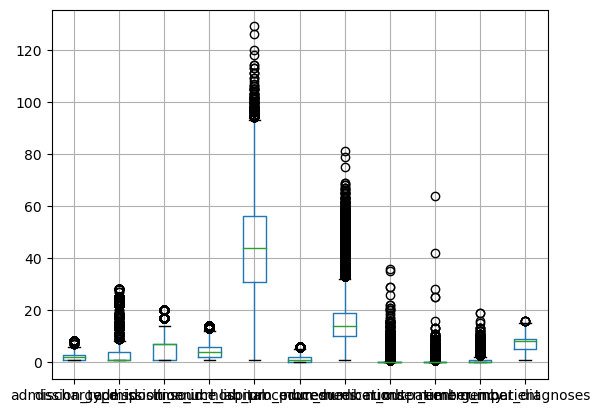

In [29]:
df.boxplot()

In [30]:
sns.displot(df['gender'])

In [31]:
sns.barplot(df)

<Axes: xlabel='gender', ylabel='Count'>

In [32]:
df.duplicated().sum()

18

## Checking for Outliers

In [33]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].boxplot(vert=0)

<Axes: >

In [34]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL #Winsorization - UL - Capping, LL - Flooring

In [35]:
df_num = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]

In [36]:
for i in df_num.columns:
    LL, UL = replace_outlier(df_num[i])
    df_num[i] = np.where(df_num[i]> UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i]< LL, LL, df_num[i])#Winsorization - Capping and Flooring

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5272\1943397354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = np.where(df_num[i]> UL, UL, df_num[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5272\1943397354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = np.where(df_num[i]< LL, LL, df_num[i])#Winsorization - Capping and Flooring


In [37]:
plt.figure(figsize=(15,15))
df_num.boxplot(vert=0)

<Axes: >

## Checking pairwise distribution of the continuous variables

In [38]:
sns.pairplot(df_num,corner=True,kind='scatter')

## Checking for Correlations

In [39]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_num.corr(), annot=True)

<Axes: >

There are mostly positive correlations between variables, and very few negative correlations.  
Overall the magnitude of correlations between the variables are very less.

## Converting all objects to categorical codes

In [40]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: race
['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
[2 0 4 1 3]


feature: gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: age
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']
[0 1 2 3 4 5 6 7 8 9]


feature: change
['No', 'Ch']
Categories (2, object): ['Ch', 'No']
[1 0]


feature: diabatic
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51252 entries, 0 to 70179
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      51252 non-null  int8 
 1   gender                    51252 non-null  int8 
 2   age                       51252 non-null  int8 
 3   admission_type_id         51252 non-null  int64
 4   discharge_disposition_id  51252 non-null  int64
 5   admission_source_id       51252 non-null  int64
 6   time_in_hospital          51252 non-null  int64
 7   num_lab_procedures        51252 non-null  int64
 8   num_procedures            51252 non-null  int64
 9   num_medications           51252 non-null  int64
 10  number_outpatient         51252 non-null  int64
 11  number_emergency          51252 non-null  int64
 12  number_inpatient          51252 non-null  int64
 13  number_diagnoses          51252 non-null  int64
 14  change                    51252 non-nu

In [42]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70175,0,0,8,1,3,7,7,60,0,17,0,1,1,9,1,0
70176,0,0,7,1,1,7,3,57,4,11,0,0,1,9,1,0
70177,0,1,9,1,3,7,4,21,1,8,0,0,1,9,1,0
70178,2,0,8,1,1,7,1,49,0,12,0,0,0,9,1,0


## Proportion of 1s and 0s

In [43]:
df.diabatic.value_counts(normalize=True)*100

1    64.978928
0    35.021072
Name: diabatic, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

## Extracting the target column into separate vectors for training set and test set

In [44]:
X = df.drop(["diabatic", "change"], axis=1)

y = df["diabatic"]

X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5


## Splitting data into training and test set

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1, stratify = y)

In [46]:
train_labels.value_counts(normalize=True)*100

1    64.979373
0    35.020627
Name: diabatic, dtype: float64

In [47]:
test_labels.value_counts(normalize=True)*100

1    64.977888
0    35.022112
Name: diabatic, dtype: float64

## Checking the dimensions of the training and test data

In [48]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (35876, 14)
X_test (15376, 14)
train_labels (35876,)
test_labels (15376,)


# Building a Decision Tree Classifier

In [49]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],#[10,20,30,50]#[3,5,7,9]
    'min_samples_leaf': [250],#[100,150,200,250]# 1-3% 50-150
    'min_samples_split': [750]#[150,300,450,600,750] # 150 - 450
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [50]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

http://webgraphviz.com/

## Variable Importance

In [51]:
print(pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
num_medications           0.570959
number_diagnoses          0.204092
num_procedures            0.087716
admission_type_id         0.039344
age                       0.036701
time_in_hospital          0.020938
admission_source_id       0.016097
race                      0.006881
num_lab_procedures        0.006053
number_outpatient         0.004970
discharge_disposition_id  0.004043
gender                    0.002206
number_emergency          0.000000
number_inpatient          0.000000


## Predicting on Training and Test dataset

In [52]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [53]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199041,0.800959
1,0.746888,0.253112
2,0.411360,0.588640
3,0.448037,0.551963
4,0.168196,0.831804


## Model Evaluation

### Confusion Matrix for the training data

In [54]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 3398,  9166],
       [ 2290, 21022]], dtype=int64)

In [55]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.6806778905117628

In [56]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.60      0.27      0.37     12564
           1       0.70      0.90      0.79     23312

    accuracy                           0.68     35876
   macro avg       0.65      0.59      0.58     35876
weighted avg       0.66      0.68      0.64     35876



In [57]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.9
cart_train_f1  0.79


### Confusion Matrix for test data

In [58]:
confusion_matrix(test_labels, ytest_predict)

array([[1417, 3968],
       [ 971, 9020]], dtype=int64)

In [59]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.6787851196670135

In [60]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.59      0.26      0.36      5385
           1       0.69      0.90      0.79      9991

    accuracy                           0.68     15376
   macro avg       0.64      0.58      0.57     15376
weighted avg       0.66      0.68      0.64     15376



In [61]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.69
cart_train_recall  0.9
cart_train_f1  0.79


# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [62]:
param_grid = {#put a grid for hyperparameters
    'max_depth': [8,9],
    'max_features': [8,9],#[5,4,6],
    'min_samples_leaf': [250,150],
    'min_samples_split': [750,500],
    'n_estimators': [100,150]#150,250
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [63]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9], 'max_features': [8, 9],
                         'min_samples_leaf': [250, 150],
                         'min_samples_split': [750, 500],
                         'n_estimators': [100, 150]})

In [64]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 150,
 'min_samples_split': 500,
 'n_estimators': 100}

In [65]:
best_grid = grid_search.best_estimator_

In [66]:
best_grid

RandomForestClassifier(max_depth=8, max_features=8, min_samples_leaf=150,
                       min_samples_split=500)

# Building a Neural Network Classifier

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [69]:
param_grid = {
    'hidden_layer_sizes': [64,128],#[32,64,128], #Multiple layers(200,120) 
    'max_iter': [100,200,300],
    'solver': ['adam','sgd'], #sgd
}

nncl = MLPClassifier(tol = 0.01)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [70]:
grid_search.fit(X_train_scaled, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 128, 'max_iter': 100, 'solver': 'adam'}

In [71]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=128, max_iter=100, tol=0.01)